# Preprocessing raw HLS and ERA5 data 






After downloading HLS L30 and ERA5-Land $T_{2m}$ data for new cities in [download data](./4_download_data.ipynb), this notebook provides steps to preprocess this data. The preprocessing pipeline produces patches for LST targets and stacked inputs (HLS bands and ERA5 statistic layers) in Geotiff format. The image below describes the preprocessing workflow. 


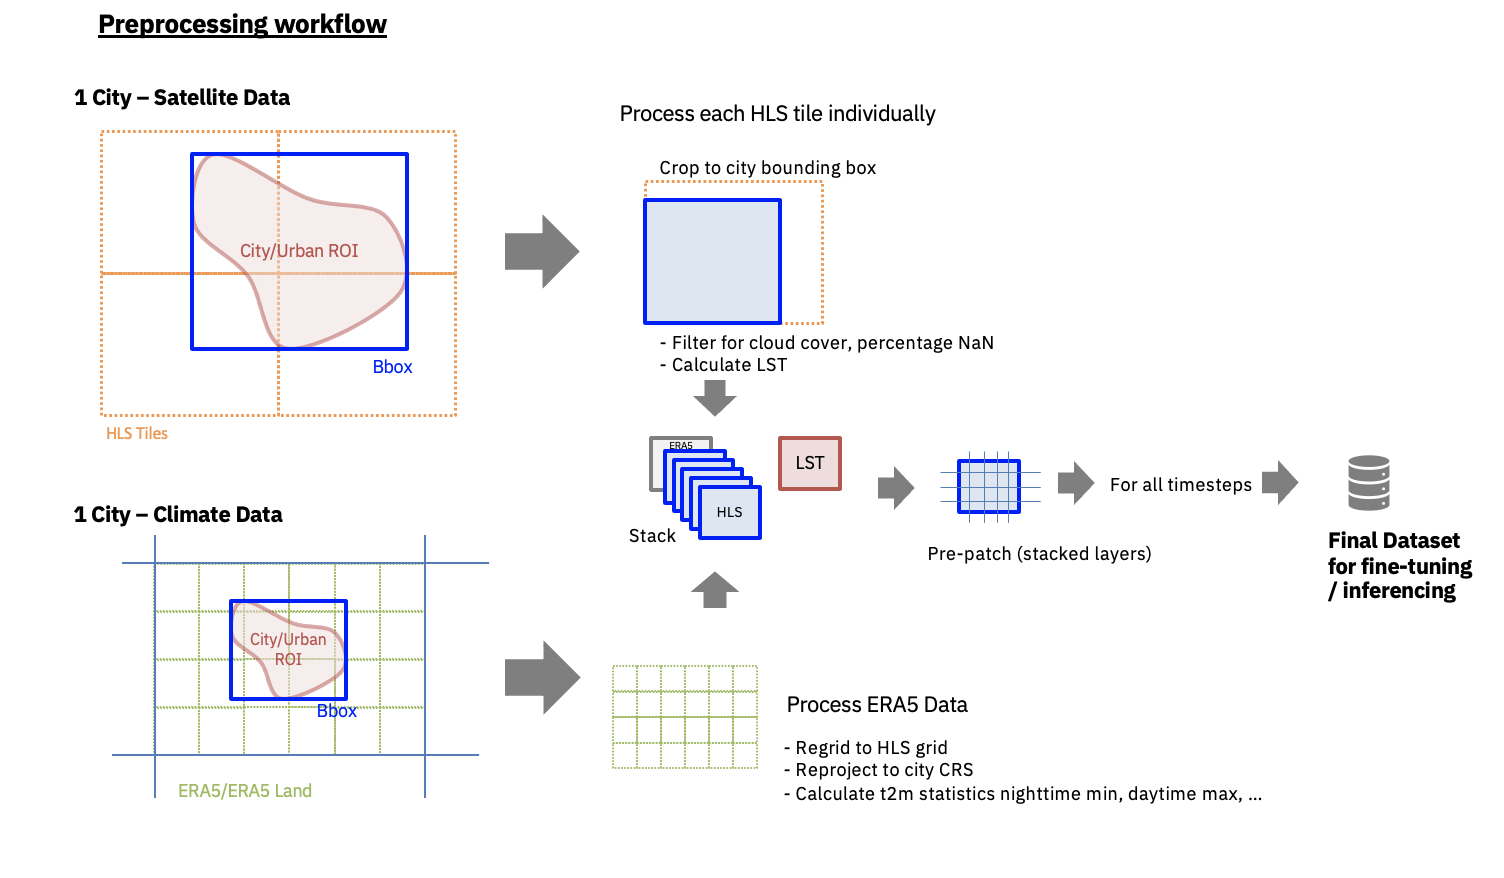

**Land Surface Temperature (LST)**

LST is computed using B04, B05, B10 and B11 from the Landsat OLI(8) acquisitions, following a split-window algorithm. 

Relevant literature: 
* Du C, Ren H, Qin Q, Meng J, Zhao S. A Practical Split-Window Algorithm for Estimating Land Surface Temperature from Landsat 8 Data. Remote Sensing. 2015; 7(1):647-665. https://doi.org/10.3390/rs70100647

## **Producing inference datasets** <br>
Activate the environment created in the [Getting Started Notebook](./1_getting_started.ipynb)

Edit the [config file](../utils/config_preprocess.json) to consider: <br>
* cloud cover percentage of HLS images to process
* scaling of HLS bands
* output file format: patches/tiles
* percentage of allowable NaNs

**Notes:**<br>
* This is an example notebook to preprocess data for a single or multiple cities.

* We assume you have downloaded the HLS L30 and ERA5 $T_{2m}$ data in the format described in [download data](./4_download_data.ipynb)

* Stacked patches or tiles produced from this workflow include ocean masking and filtering for invalid data (clouds, negative and NaN pixels) based on the specified allowed NaN precentage "perc_nan". 

* Output patches or tiles are saved with a local timestamp and will not correspond to the UTC timestamp on the raw HLS tiles. This is to ensure the correct ERA5 $T_{2m}$ statistics are computed.


Check the log files to verify any errors in the processed tiles/patches.

### **1. Stacked-tiles**
To produce full stacked tiles, edit the "stack_patch" section on [config file](../utils/config_preprocess.json) as follows:
* "output_files": "stacked-tiles"  
* "perc_nan": Set the percentage of allowed invalid pixels (float)

### **Warning**: 
Depending on the number of cities and period of data downloaded, large RAM might be required to run the preprocessing cell below. Alternatively, consider preprocessing only a subset of the data.


In [12]:
# PREPROCESSING DATA FOR NEW CITY DOWNLOADED
!python ../utils/main_preprocess.py --configpath ../utils/config_preprocess.json

Workflow for ../utils/config_preprocess.json to produce stacked tiles for inference is complete.


#### Visualize stacked-tiles

In [9]:
# Import libraries
import glob
import os

from utils.plotting import plot_preprocessed_images

In [10]:
# Use one example geotiff from stacked inputs and targets

patched_inputs_path = "../data/processed_data/stacked-tiles/"
patched_targets_path = "../data/processed_data/processed-lst/"

input_files = glob.glob(os.path.join(patched_inputs_path, "*.tif"))
input_file = sorted(input_files)[0]

target_files = glob.glob(os.path.join(patched_targets_path, "*.tif"))
target_file = sorted(target_files)[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2871332..12.586125].
/Users/tamaragovindasamy/Desktop/granite-geospatial-land-surface-temperature/utils/plotting.py:618: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


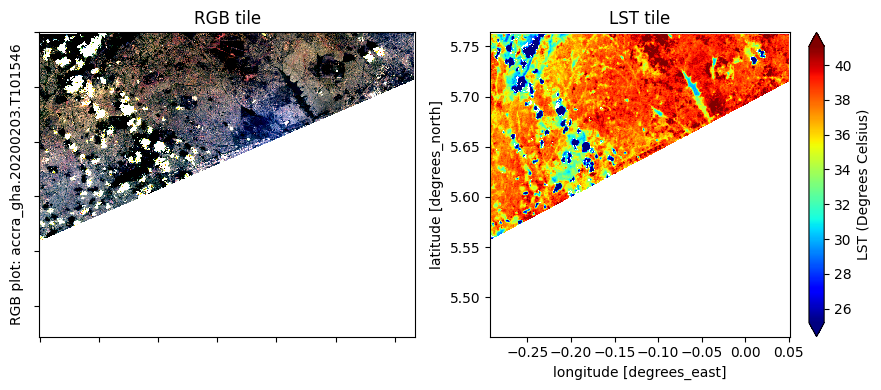

In [11]:
plot_preprocessed_images(input_file, target_file)

* Certain tiles have a larger percentage of invalid pixels due to negative pixels and distortions in the satellite acquisitions. 

#### To run inference on the model using these stacked-tiles

Refer to the [Getting Started Notebook](./1_getting_started.ipynb)

### **2. Stacked-patches**

To produce full stacked patches, edit the "stack_patch" section on [config file](../utils/config_preprocess.json) as follows:
* "output_files": "stacked-patches"  
* "perc_nan": Set the percentage of allowed invalid pixels (float)
* "patch_sizes": Recommended is [224, 224]


Patches of size 224 x 224 can also be used for fine-tuning applications, refer to the end of this notebook for more details. 

**Notes:**<br>
* The current train-test-val splitting process runs on the scikit learn module, and will split the data randomly into train, test and val, and does not account for the number of samples per city. This often results in unbalanced datasets where certain cities might be over-represented. Review the scikit learn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for additional options. 

* Output patches are saved with a local timestamp and will not correspond to the UTC timestamp on the raw HLS tiles. This is to ensure the correct ERA5 $T_{2m}$ statistics are computed. 

Check the log files to verify any errors in the processed tiles/patches.

### **Warning**: 
Depending on the number of cities and period of data downloaded, large RAM might be required to run the preprocessing cell below. Alternatively, consider preprocessing only a subset of the data.

In [3]:
# PREPROCESSING DATA FOR NEW CITY DOWNLOADED
!python ../utils/main_preprocess.py --configpath ../utils/config_preprocess.json

Workflow for ../utils/config_preprocess.json to produce stacked tiles for inference is complete.


#### Visualize stacked-patches


In [ ]:
# Import libraries
import glob
import os

from utils.plotting import plot_preprocessed_images

In [ ]:
# Use one example geotiff from stacked inputs and targets

patched_inputs_path = "../data/processed_data/patched-inputs/"
patched_targets_path = "../data/processed_data/patched-targets/"

input_files = glob.glob(os.path.join(patched_inputs_path, "*.tif"))
input_file = sorted(input_files)[0]

target_files = glob.glob(os.path.join(patched_targets_path, "*.tif"))
target_file = sorted(target_files)[0]

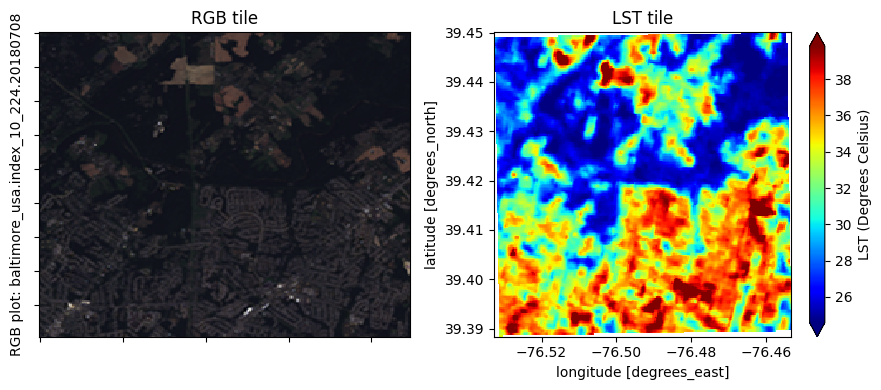

In [11]:
plot_preprocessed_images(input_file, target_file)

#### You are now ready to run inference using these stacked patches

Refer to the [Getting Started Notebook](./1_getting_started.ipynb)

## **Fine-tuning applications**
For advanced applications, stacked-patches of size 224x224 can be used to fine-tune the original [IBM Prithvi Earth Observation Foundation Model](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M)

For further information on the fine-tuning process, please refer to the [Terratorch quick start guide](https://ibm.github.io/terratorch/quick_start/) and the [Terratorch repository](https://github.com/IBM/terratorch)
